<hr>
# Classification
<br>
<br>
<font size=5>In this case, the objective is to determinate if the variable belongs to one of several predefined classes or states. 
An very known example of this is the classification of iris flowers among three species (setosa, versicolor or virginica) using as features measurements of length and width of sepals and petals.</font>
<br>
<br>
<img src="pictures/iris.png" alt="drawing" width="800"/>
<br>
<br>
<font size=5> A calssification problem can be binary (two classes) or multi-class
<br>
<br>
<img src="pictures/binaryandnot.png" alt="drawing" width="600"/>
<br>
<br>
We will first focus on binary porblems and later we can expand this to multi-class porblems</font>

## Losgistic regression
<br>
<font size=5>We will start with a simple classification algortim called logistic regression. Trough it we will undrestand some characteristics and specificities of classification algorithms.
<br>
<br>
As ususal, we will undrestand this method using an example.
<br>
<br>
Imagine you have a group of mouses and want to determine wether they are obese or not using their weight. You may have data that looks like this:
<br>
<br>
<img src="pictures/logisticr1.jpg" alt="drawing" width="800"/>
<br>
<br>
In this case we will classify mouses in two classes: obese an not obese.  That means that our output variable is not a continuos value, but a discrete quantity that may take only two values: 0 or 1. 0 means the mouse is not obese, 1 means it is obese.
<br>
<br>
The first thing we coold do with this is to aproach these as a regression porblem and try to fit a linear model to the data. Something like this:
<br>
<br>
<img src="pictures/logisticr2.jpg" alt="drawing" width="800"/>
<br>
<br>    
 And to cope with the fact that the output is dicrete we could defien that:
<br>
<br>
if $y\geq 0.5$ then $y=1$
<br>
<br>
if $y < 0.5$ then $y=0$
<br>
<br>
An taht means taht we would have some sort of a threshold like this: 
<br>
<br>
<img src="pictures/logisticr3.jpg" alt="drawing" width="800"/>
<br>
<br>
And that result is probably not that bad.
<br>
<br>
How ever, it may have some porblems as we will se in the next example. Imagine we add an extra data point like this:
<br>
<br>
<img src="pictures/logisticr4.jpg" alt="drawing" width="800"/>
<br>
<br>    
That example shouldn´t change anything in terms of classification, but it can really damage our model:    
<br>
<br>
<img src="pictures/logisticr5.jpg" alt="drawing" width="800"/>
<br>
<br> 
The idea behind logistic regression is to change the model. We will not longer use a linear equation, but a losgistic or sigmoid equation.
<br>
<br>
$y(x)=g(\theta^Tx)$ 
<br>
<br>
$ g(z)= \frac{1} {1+e^{-z}}$
<br>
<br>
It looks like this:
<br>
<br>
<img src="pictures/logisticcurve.png" alt="drawing" width="500"/>
<br>
<br>
This is going ot behave much better than the linear equiation and you can see that the output is necesarely goning to be between 0 and 1.
<br>
<br>
## Interpretation of the output
<br>
<br>
A commo way to interpret the output of this kind of model is that the value of the output represents the probability that the sample has to belong to a specific class. That is: 
<br>
<br>
$p(y=1|x;\theta)$
<br>
<br>
And, given that is a binary problem:
<br>
<br>
$p(y=0|x;\theta)= 1-p(y=1|x;\theta)$
<br>
<br>
And we could choose the threshold that defines wether a point belongs to a class or not, depending on how sensitive to detecting an specific class  .
<br>
<br>
## Decision boundary
<br>
<br>
If we choose 0.5 as the threshold, we can see taht the output will be 1 if $g(z)>0.5$, that is if $z>0$ where $z=f(x)=\theta^Tx$. that means taht we have a desicion boundary in f(x)=0.
<br>
<br>
<img src="pictures/logisticcurve2.png" alt="drawing" width="500"/>
<br>
<br>
Now, let´s se how this looks if we have a calssification porblem with two input features. As an example we can imagine that we are going to calssify mouses in obese and not obese using their weight and size.
<br>
<br>
<img src="pictures/logisticr6.jpg" alt="drawing" width="800"/>
<br>
<br>
Notice that in this representation we are not considering the output as an axis. We are representing it by the symbol of echa point.
<br>
<br>
If in this case $z= f(x)=\theta^Tx=  \theta_0+ \theta_1x_1 + \theta_2x_2$ and our decision boundary isin: 
<br>
<br>
$z=f(x)=\theta_0+ \theta_1x_1 + \theta_2x_2=0$
<br>
<br>
In this plane, that equation correponds to a line, that can look something like this:
<br>
<br>
<img src="pictures/logisticr7.jpg" alt="drawing" width="800"/>
<br>
<br>
Here we can clearly see that we have a linear decision boundary.
<br>
<br>
## Cost function
Just as in linear regression, we can use gradiende descent to solve this porblem, but the cost funtion will have to change. In linear regression we used:
<br>
<br>
 $ J(\beta) = \frac{1}{m} \sum_{i=1}^m ( \frac{1}{2} (f(x^{(i)}) -y^{(i)})^2)$    
<br>
<br>
That is
<br>
<br>
 $ J(\beta) = \frac{1}{m} \sum_{i=1}^m (cost(f(x),y)$    
<br>
<br>
Now, we will change he "cost". The reason to change it is that if we use the same cost $J(\beta)$ is going to be a non convex function. So, to guarantee a convex funtion we will use the following.
<br>
<br>
$cost(f(x),y) = \begin{cases} -log(f(x)), & \mbox{if } y\mbox{ =1} \\ -log(1-f(x)), & \mbox{if } y\mbox{ =0} \end{cases}$

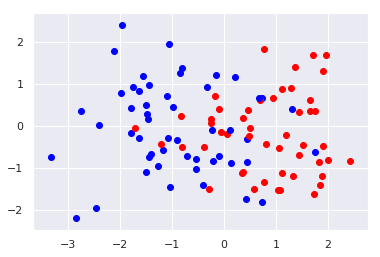

[[1.33071755 0.10536854]]
[0.26799211]


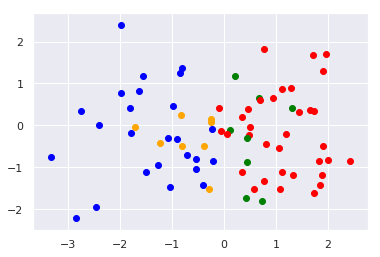

array([[25,  8],
       [ 8, 34]])

In [26]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import pandas as pd


#create a data set
x, y = make_classification(
    n_samples=100,
    n_features=2,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.03,
    n_informative=1,
    n_redundant=0,
    n_repeated=0
)

# plot data set
for i in range (0, 100):
    if y[i]==0:
        plt.scatter(x[i,0],x[i,1], color='blue')
    else:
         plt.scatter(x[i,0],x[i,1], color='red')

plt.show()            
            
 # split data set in train and test           
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

#Create model
lr = LogisticRegression()

# Fit model
lr.fit(x_train, y_train)

#Print coeficients and intercept
print(lr.coef_)
print(lr.intercept_)

#Predict with train  data
y_pred = lr.predict(x_train)

# plot training data set
for i in range (0, 75):
    if y_train[i]==0:
        if y_pred[i]==0:
            plt.scatter(x_train[i,0],x_train[i,1], color='blue')
        else:
            plt.scatter(x_train[i,0],x_train[i,1], color='green')
    else:
        if y_pred[i]==1:
                plt.scatter(x_train[i,0],x_train[i,1], color='red')
        else:
            plt.scatter(x_train[i,0],x_train[i,1], color='orange')

plt.show() 

confusion_matrix(y_train, y_pred)

           

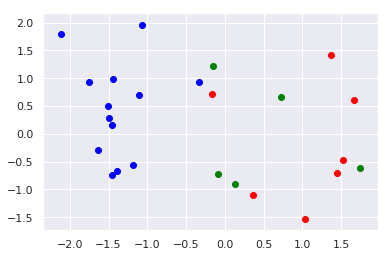

array([[13,  5],
       [ 0,  7]])

In [29]:
#Prediction with test data
y_pred = lr.predict(x_test)

# plot training data set
for i in range (0, 25):
    if y_test[i]==0:
        if y_pred[i]==0:
            plt.scatter(x_test[i,0],x_test[i,1], color='blue')
        else:
            plt.scatter(x_test[i,0],x_test[i,1], color='green')
    else:
        if y_pred[i]==1:
                plt.scatter(x_test[i,0],x_test[i,1], color='red')
        else:
            plt.scatter(x_test[i,0],x_test[i,1], color='orange')

plt.show() 

confusion_matrix(y_test, y_pred)


           

<hr>
# The confusion matrix
<br>
<br>
<font size=5>A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.
<br>
<br>
Let's explain how it works.starting with an example confusion matrix for a binary classifier (though it can easily be extended to the case of more than two classes)
<br>
<br>
Wi will make a matriz where de rows correspond to the predicted value and the columns correpond to the actual known values. Like this:
<br>
<br>
<img src="pictures/confusion-matrix.png" alt="drawing" width="800"/>
<br>
<br>
true positives (TP): These are cases in which we predicted 1, and the real value was 1.
true negatives (TN): We predicted 0, and the real value is 0.
false positives (FP): We predicted 1, and the real value is 0. (Also known as a "Type I error.")
false negatives (FN): We predicted 0, and the real value is 1.(Also known as a "Type II error.")
<br>
<br>
This is a good tool to compare different algorithms.
<br>
<br>

#  Sensitivity and Specificity
<br>
<br>
## Sensitivity
<br>
<br>
Sensitivity tell us the percentage of positive cases that were correcly calssified.
<br>
<br>
$Sensitivity=\frac{TP}{TP+FN}$
<br>
<br>
## Specificity
<br>
<br>
Sensitivity tell us the percentage of negative cases that were correcly calssified.
<br>
<br>
$Specificity=\frac{TN}{TN+FP}$
<br>
<br>
# Receiver operating characteristic (ROC) curve
<br>
<br>
A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The curve is constructedo ploting the false positive rate (1-specificity) vs the true positive rate (sensitivity) when we chanfe the threshold.
<br>
<br>
<img src="pictures/rocandaoc.png" alt="drawing" width="500"/>
<br>
<br>
Te area under this curve (AUC) is also an known parameter.


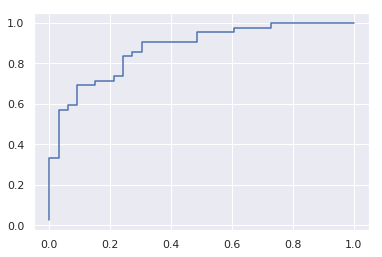

In [30]:
y_prob= lr.predict_proba(x_train)
fpr, tpr, thresholds=roc_curve(y_train, y_prob[:,1],pos_label=1)
plt.plot(fpr,tpr)
plt.show()

<hr>
# Linear discriminant analysis
<br>
<br>
<font size=5>The objective of LDA is to perform dimensionality reduction, while preservinng as much of the class discriminatory information as possible.
<br>
<br>
<img src="pictures/lda1.jpg" alt="drawing" width="500"/>
<br>
<br>
<font size=5> A calssification problem can be binary (two classes) or multi-class
<br>
<br>
<img src="pictures/lda2.jpg" alt="drawing" width="500"/>
<br>
<br>
<br>
<br>
<img src="pictures/lda3.jpg" alt="drawing" width="500"/>
<br>
<br>
<br>
<br>
<img src="pictures/lda4.jpg" alt="drawing" width="700"/>
<br>
<br>
<br>
<br>
<img src="pictures/lda5.jpg" alt="drawing" width="800"/>
<br>
<br>
<br>
<br>
<img src="pictures/lda6.jpg" alt="drawing" width="500"/>
<br>
<br>
<br>
<br>
<img src="pictures/lda7.jpg" alt="drawing" width="500"/>
<br>
<br>
<br>
<br>
<img src="pictures/lda8.jpg" alt="drawing" width="500"/>
<br>
<br>